In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
f
url="https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
dataf=pd.read_csv(url)
dataf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
dataf.info()
dataf.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


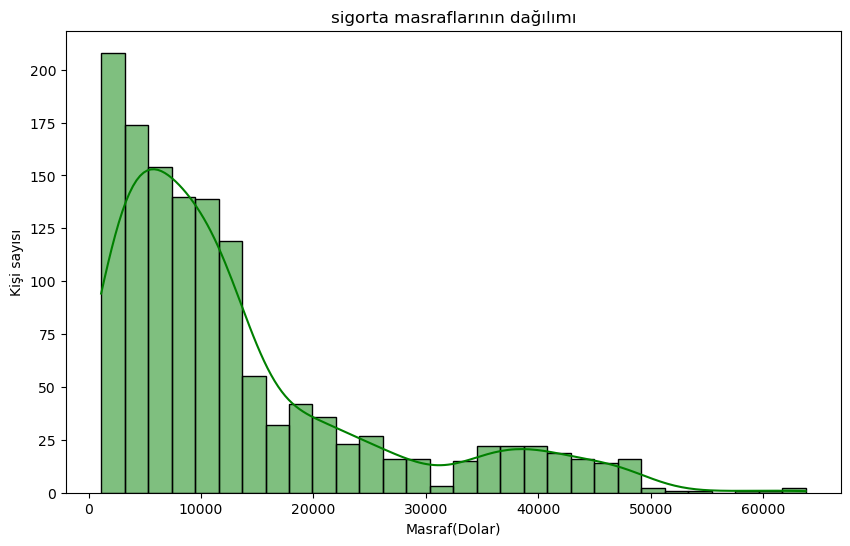

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(dataf['charges'], kde="True", color="Green")
plt.title("sigorta masraflarının dağılımı")
plt.xlabel("Masraf(Dolar)")
plt.ylabel("Kişi sayısı")
plt.show()

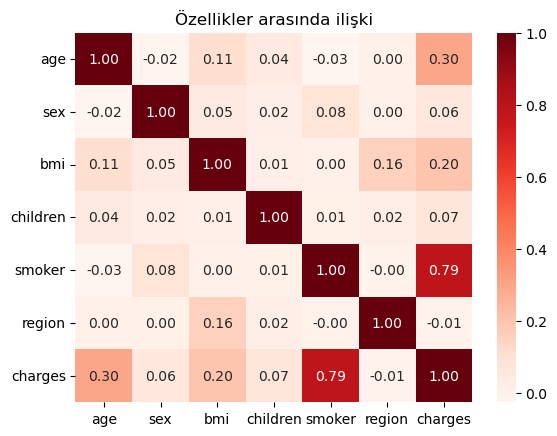

In [13]:
korelasyon=dataf.select_dtypes(include='number').corr()
sns.heatmap(korelasyon,annot=True,cmap="Reds",fmt=".2f")
plt.title("Özellikler arasında ilişki")
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
lae=LabelEncoder()
dataf['smoker']=lae.fit_transform(dataf['smoker'])
dataf['region']=lae.fit_transform(dataf['region'])
dataf['sex']=lae.fit_transform(dataf['sex'])
dataf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X=dataf.drop('charges',axis=1)
y=dataf['charges']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
tahminler=model.predict(X_test)
basari_puani=r2_score(y_test,tahminler)
print("Modelin başarı puanı=",basari_puani)

Modelin başarı puanı= 0.7833463107364539
